# Vector Embeddings: From Text to Mathematics

## Introduction
This notebook demonstrates how to work with vector embeddings - the mathematical foundation of RAG systems. We'll explore both OpenAI's embeddings and open-source alternatives using Sentence Transformers.

## Installing Required Libraries
First, let's install all the necessary Python libraries. This includes:
- `openai`: For accessing OpenAI's embedding models
- `sentence-transformers`: Open-source embedding models
- `numpy`: For numerical operations
- `matplotlib`: For visualization
- `scikit-learn`: For similarity calculations and dimensionality reduction
- `python-dotenv`: For environment variable management

In [ ]:
! pip install openai sentence-transformers numpy matplotlib scikit-learn python-dotenv

## Importing Libraries and Setting Up Environment

We'll import all necessary libraries and set up our environment. Make sure you have your OpenAI API key stored in a `.env` file or as an environment variable.

**Key Libraries:**
- **OpenAI**: For commercial embedding models
- **SentenceTransformers**: For free, local embedding models
- **NumPy**: For array operations and mathematical calculations
- **Cosine Similarity**: To measure semantic similarity between embeddings
- **sklearn**: For decompostion into PCA

In [103]:
import openai
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re
from sklearn.decomposition import PCA

In [54]:
openai.api_key="API_KEY"

## Creating OpenAI Embeddings

This function creates embeddings using OpenAI's embedding models. We're using the `text-embedding-3-small` model which provides:
- 1,536 dimensions per embedding
- High-quality semantic representations
- Optimized for similarity search tasks

**Note**: You'll need an OpenAI API key for this to work. The cost is typically very low (pennies per thousand texts).

In [55]:
def get_openai_embeddings(text, model = 'text-embedding-3-small'):
    response = openai.embeddings.create(
        input = text,
        model = model
    )
    return response.data[0].embedding

## Sample Text Data for Testing

We'll use these sample texts to demonstrate how embeddings capture semantic similarity:
- Two sentences about cats (different words, same meaning)
- One sentence about dogs (related but different topic)
- Two sentences about AI/ML (technical domain, similar concepts)

This variety will help us see how embeddings group similar meanings together.

In [56]:
sample_texts = [
    'The cat sits on the mat',
    'A feline rests on the carpet',
    'Dogs are great pets',
    'Artificial intelligence is transforming technology',
    'Machine learning revolutionizes software development'
]

## Generating OpenAI Embeddings

Let's create embeddings for our sample texts and examine their properties:
- **Embedding Length**: Each text becomes a 1,536-dimensional vector
- **Value Range**: Numbers typically range between -1 and 1
- **Semantic Encoding**: Similar texts should produce similar vectors

Pay attention to how each text is converted into a numerical representation.

In [57]:
openai_embeddings = []
for text in sample_texts:
    embedding = get_openai_embeddings(text)
    openai_embeddings.append(embedding)
    print(f'Text: {text}')
    print(f'Embedding Length: {len(embedding)}')
    print(f'First 5 values: {embedding[:5]}')

Text: The cat sits on the mat
Embedding Length: 1536
First 5 values: [-0.039671290665864944, -0.05845513939857483, 0.012683428823947906, -0.002083485247567296, 0.039176326245069504]
Text: A feline rests on the carpet
Embedding Length: 1536
First 5 values: [-0.00980573333799839, -0.07922207564115524, -0.012255650013685226, 0.04426830634474754, -0.011891800910234451]
Text: Dogs are great pets
Embedding Length: 1536
First 5 values: [0.036922238767147064, -0.006009977776557207, -0.009725624695420265, 0.05655447766184807, 0.020228447392582893]
Text: Artificial intelligence is transforming technology
Embedding Length: 1536
First 5 values: [0.0023555962834507227, -0.015442242845892906, 0.0052911690436303616, 0.001766697270795703, 0.0487774983048439]
Text: Machine learning revolutionizes software development
Embedding Length: 1536
First 5 values: [-0.009222925640642643, -0.020683810114860535, 0.003550163237378001, 0.006967663764953613, 0.05149611085653305]


## Measuring Semantic Similarity

This function calculates cosine similarity between all pairs of embeddings. Cosine similarity measures the angle between vectors:
- **1.0**: Identical meaning
- **0.0**: Completely unrelated
- **-1.0**: Opposite meanings

The similarity matrix will show us how well embeddings capture semantic relationships.

In [68]:
def calcualte_similarity_matrix(embeddings, texts):
    similarity_matrix = cosine_similarity(embeddings)
    print('\nSimilarity Matrix:')
    print('(1.0 = identical, 0.0 = unrelated, -1.0 = opposite)\n')
    for i,text in enumerate(texts):
        print(f'{text}:')
        for j,other_text in enumerate(texts):
            if i != j:
                print(f'{other_text}: {similarity_matrix[i][j]:.3f}')
        print('\n')

In [69]:
similarity_matrix = calcualte_similarity_matrix(openai_embeddings, sample_texts)


Similarity Matrix:
(1.0 = identical, 0.0 = unrelated, -1.0 = opposite)

The cat sits on the mat:
A feline rests on the carpet: 0.633
Dogs are great pets: 0.226
Artificial intelligence is transforming technology: 0.060
Machine learning revolutionizes software development: 0.066


A feline rests on the carpet:
The cat sits on the mat: 0.633
Dogs are great pets: 0.241
Artificial intelligence is transforming technology: 0.052
Machine learning revolutionizes software development: 0.072


Dogs are great pets:
The cat sits on the mat: 0.226
A feline rests on the carpet: 0.241
Artificial intelligence is transforming technology: 0.115
Machine learning revolutionizes software development: 0.128


Artificial intelligence is transforming technology:
The cat sits on the mat: 0.060
A feline rests on the carpet: 0.052
Dogs are great pets: 0.115
Machine learning revolutionizes software development: 0.530


Machine learning revolutionizes software development:
The cat sits on the mat: 0.066
A feline r

## Analyzing Similarity Results

Now let's calculate and examine the similarity matrix. Look for:
- High similarity (>0.7) between the two cat sentences
- Moderate similarity (~0.4-0.6) between related but different topics
- High similarity between the AI/ML sentences
- Lower similarity between completely different topics

This demonstrates that embeddings capture meaning beyond just word matching.

## Open-Source Alternative: Sentence Transformers

Now let's try Sentence Transformers, a free alternative that runs locally:
- **Model**: `all-MiniLM-L6-v2` - fast and efficient
- **Dimensions**: 384 (smaller than OpenAI's 1,536)
- **Advantages**: Free, private, no API calls needed
- **Trade-offs**: Slightly lower quality than latest commercial models

The model will download automatically on first use (~90MB).

In [78]:
# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

def get_sentence_transformer_embedding(texts):
    """Get embeddings from Sentence Transformers"""
    embeddings = model.encode(texts)
    return embeddings

# Create embeddings
st_embeddings = get_sentence_transformer_embedding(sample_texts)

# Compare dimensions
print(f'OpenAI embeddings: {len(openai_embeddings[0])} dimensions')
print(f'Sentence Transformers: {st_embeddings.shape[1]} dimensions')

OpenAI embeddings: 1536 dimensions
Sentence Transformers: 384 dimensions


In [72]:
st_embeddings = []
for text in sample_texts:
    # Create embeddings
    st_embedding = get_sentence_transformer_embedding(sample_texts)
    st_embeddings.append(st_embedding)
    print(f'Text: {text}')
    print(f'Embedding Length: {len(st_embedding)}')
    print(f'First 5 values: {st_embedding[:5]}')

Text: The cat sits on the mat
Embedding Length: 5
First 5 values: [[ 0.13489069 -0.03206337 -0.02033523 ...  0.04674225  0.01492448
   0.0586335 ]
 [ 0.10853077 -0.01404398  0.04354559 ...  0.05513833  0.04589896
  -0.01095773]
 [-0.00174971 -0.02411854  0.097723   ...  0.09554524  0.05103692
   0.06033277]
 [ 0.01783543  0.02670838  0.07502455 ... -0.03676512  0.09385739
  -0.05011703]
 [-0.00586967 -0.03053891  0.05954926 ...  0.00095071  0.06504414
  -0.01215227]]
Text: A feline rests on the carpet
Embedding Length: 5
First 5 values: [[ 0.13489069 -0.03206337 -0.02033523 ...  0.04674225  0.01492448
   0.0586335 ]
 [ 0.10853077 -0.01404398  0.04354559 ...  0.05513833  0.04589896
  -0.01095773]
 [-0.00174971 -0.02411854  0.097723   ...  0.09554524  0.05103692
   0.06033277]
 [ 0.01783543  0.02670838  0.07502455 ... -0.03676512  0.09385739
  -0.05011703]
 [-0.00586967 -0.03053891  0.05954926 ...  0.00095071  0.06504414
  -0.01215227]]
Text: Dogs are great pets
Embedding Length: 5
First

## Performance Optimization: Batch Processing

**Why Batch Processing Matters:**
Batch processing is crucial for efficiency when working with many texts:
- **API Efficiency**: Reduces number of API calls by 100x
- **Cost Savings**: Lower API costs due to fewer requests
- **Speed**: Significantly faster processing times
- **Rate Limits**: Helps avoid hitting API rate limits

**Comparison:**
- ❌ **Individual Processing**: One API call per text
- ✅ **Batch Processing**: One API call for multiple texts

In [80]:
import openai
import time

# Inefficient: Processing one by one
print("🚫 Starting inefficient individual API calls...")
embeddings = []
start_time = time.time()
for i, text in enumerate(sample_texts):
    print(f"Processing item {i+1}/{len(sample_texts)} individually...")
    embedding = get_openai_embeddings(text)  # Individual API call
    embeddings.append(embedding)
print(f"⏱️ Individual processing completed in {time.time() - start_time:.2f} seconds.\n")

# Efficient: Batch processing
def get_openai_embeddings_batch(texts, batch_size=100):
    """Process texts in batches for efficiency"""
    all_embeddings = []
    print(f"🚀 Starting efficient batch processing with batch size = {batch_size}...")
    start_time = time.time()
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        print(f"Processing batch {i//batch_size + 1} ({len(batch)} items)...")
        response = openai.embeddings.create(
            input=batch,
            model='text-embedding-3-small'
        )
        batch_embeddings = [item.embedding for item in response.data]
        all_embeddings.extend(batch_embeddings)
    print(f"✅ Batch processing completed in {time.time() - start_time:.2f} seconds.\n")
    return all_embeddings

# Run efficient batch version
batched_embeddings = get_openai_embeddings_batch(sample_texts)

# Sentence Transformers: automatic batching
print("⚡ Using Sentence Transformers (automatic batching)...")
st_embeddings = model.encode(sample_texts)
print("✅ Sentence Transformers processing completed.\n")


🚫 Starting inefficient individual API calls...
Processing item 1/5 individually...
Processing item 2/5 individually...
Processing item 3/5 individually...
Processing item 4/5 individually...
Processing item 5/5 individually...
⏱️ Individual processing completed in 2.84 seconds.

🚀 Starting efficient batch processing with batch size = 100...
Processing batch 1 (5 items)...
✅ Batch processing completed in 1.07 seconds.

⚡ Using Sentence Transformers (automatic batching)...
✅ Sentence Transformers processing completed.



## Performance Optimization: Caching System

**Why Caching is Essential:**
Embeddings are expensive to compute, so caching saves:
- **Time**: Avoid recomputing identical texts
- **Money**: Reduce API calls and costs
- **Resources**: Less computational overhead

**Our Cache Features:**
- **Persistent Storage**: Saves cache to disk using pickle
- **Hash-based Keys**: Uses MD5 hashes for efficient lookup
- **Model Differentiation**: Separate cache entries for different models
- **Automatic Management**: Loads and saves cache automatically

In [81]:
import pickle
import hashlib

class EmbeddingCache:
    def __init__(self, cache_file='embeddings_cache.pkl'):
        self.cache_file = cache_file
        self.cache = self._load_cache()
        print(f"📁 Loaded cache with {len(self.cache)} entries.")

    def _load_cache(self):
        try:
            with open(self.cache_file, 'rb') as f:
                return pickle.load(f)
        except FileNotFoundError:
            print("⚠️ No cache file found. Starting fresh.")
            return {}

    def _save_cache(self):
        with open(self.cache_file, 'wb') as f:
            pickle.dump(self.cache, f)
        print("💾 Cache saved.")

    def get_embedding(self, text, model='openai'):
        # Create unique hash key for the text
        text_hash = hashlib.md5(text.encode()).hexdigest()
        cache_key = f"{model}_{text_hash}"

        # Check cache first
        if cache_key in self.cache:
            print(f"✅ Cache hit for model: {model}")
            return self.cache[cache_key]
        
        print(f"🧠 Generating new embedding for model: {model}")

        # Generate embedding
        if model == 'openai':
            embedding = get_openai_embeddings(text)  # Make sure this is defined elsewhere
        else:
            embedding = get_sentence_transformer_embedding(text)  # SentenceTransformer

        # Save to cache
        self.cache[cache_key] = embedding
        self._save_cache()
        return embedding


In [82]:
cache = EmbeddingCache()
embedding = cache.get_embedding("Hello world", model='openai')


⚠️ No cache file found. Starting fresh.
📁 Loaded cache with 0 entries.
🧠 Generating new embedding for model: openai
💾 Cache saved.


## Performance Optimization: Vector Normalization

**Why Normalize Embeddings:**
Normalization ensures all vectors have unit length (norm = 1):
- **Consistent Similarity**: Makes cosine similarity more reliable
- **Faster Computation**: Normalized vectors allow dot product = cosine similarity
- **Better Clustering**: Improves clustering and search results

**Mathematical Benefit:**
For normalized vectors, cosine similarity becomes a simple dot product operation.

In [84]:
import numpy as np

def normalize_embeddings(embeddings):
    """Normalize embeddings to unit length (L2 norm = 1)"""
    embeddings = np.array(embeddings)
    norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
    return embeddings / norms

# Step 1: Get raw embeddings
print("🔍 Getting raw embeddings for input texts...")
embeddings = get_openai_embeddings_batch(sample_texts)  # Make sure this function is defined

# Step 2: Show norms before normalization
original_norms = [np.linalg.norm(emb) for emb in embeddings[:3]]
print("\n📏 Original vector norms (before normalization):")
for i, norm in enumerate(original_norms):
    print(f"  • Vector {i+1} norm: {norm:.4f}")

# Step 3: Normalize embeddings
print("\n⚙️ Normalizing embeddings to unit length...")
normalized_embeddings = normalize_embeddings(embeddings)

# Step 4: Show norms after normalization
normalized_norms = [np.linalg.norm(emb) for emb in normalized_embeddings[:3]]
print("\n✅ Normalized vector norms (should be close to 1):")
for i, norm in enumerate(normalized_norms):
    print(f"  • Vector {i+1} norm: {norm:.4f}")

# Step 5: Cosine similarity becomes a simple dot product
print("\n📐 Computing cosine similarity between first two normalized vectors...")
similarity = np.dot(normalized_embeddings[0], normalized_embeddings[1])
print(f"🔗 Cosine similarity (dot product): {similarity:.4f}")

# Optional insight
print("\n💡 Because the vectors are now unit length, the dot product equals cosine similarity!")


🔍 Getting raw embeddings for input texts...
🚀 Starting efficient batch processing with batch size = 100...
Processing batch 1 (5 items)...
✅ Batch processing completed in 1.00 seconds.


📏 Original vector norms (before normalization):
  • Vector 1 norm: 1.0000
  • Vector 2 norm: 1.0000
  • Vector 3 norm: 1.0000

⚙️ Normalizing embeddings to unit length...

✅ Normalized vector norms (should be close to 1):
  • Vector 1 norm: 1.0000
  • Vector 2 norm: 1.0000
  • Vector 3 norm: 1.0000

📐 Computing cosine similarity between first two normalized vectors...
🔗 Cosine similarity (dot product): 0.6334

💡 Because the vectors are now unit length, the dot product equals cosine similarity!


## Performance Optimization: Choosing the Right Model

**Model Selection Strategy:**
Different models are optimized for different tasks:
- **General Purpose**: `all-MiniLM-L6-v2` - good for most applications
- **Question-Answering**: `multi-qa-MiniLM-L6-cos-v1` - optimized for Q&A tasks
- **Scientific Text**: `allenai-specter` - trained on scientific papers
- **Multilingual**: `paraphrase-multilingual-MiniLM-L12-v2` - supports many languages

**Performance Test:**
We'll compare how different models handle the same text to see the differences.

In [86]:
# For general purpose text
general_model = SentenceTransformer('all-MiniLM-L6-v2')

# For question-answering tasks
qa_model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

# Performance comparison
test_texts = ["What is machine learning?", "How does AI work?"]

for model_name, model in [
    ("General", general_model),
    ("Q&A Optimized", qa_model)
]:
    embeddings = model.encode(test_texts)
    similarity = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    print(f"{model_name} model similarity: {similarity:.3f}")

General model similarity: 0.506
Q&A Optimized model similarity: 0.410


## Common Pitfall #1: Don't Mix Embedding Models

**The Problem:**
Embeddings from different models exist in different mathematical spaces. Comparing them is like comparing temperatures in Celsius with distances in miles - the numbers are meaningless.

**What Happens:**
- Similarity scores become unreliable
- Search results are poor
- Clustering fails

**The Solution:**
Always use the same model for all embeddings in a single application.

In [98]:
# ❌ WRONG: Mixing embeddings from different models
print("🚫 Example 1: Mixing embeddings from different models...")

try:
    embedding_1 = get_openai_embeddings("A feline rests on the carpet")
    embedding_2 = model.encode("The cat sits on the mat")

    similarity_right = cosine_similarity([embedding_1], [embedding_2])
    print(f"✅ Cosine similarity (same model): {similarity_right:.4f} — ✔️ Valid result")

except Exception as e:
    print("❌ Error computing similarity:", e)

print("\n⚠️ Why? Because the embeddings are from different models and live in different vector spaces.")

🚫 Example 1: Mixing embeddings from different models...
❌ Error computing similarity: Incompatible dimension for X and Y matrices: X.shape[1] == 1536 while Y.shape[1] == 384

⚠️ Why? Because the embeddings are from different models and live in different vector spaces.


In [92]:
print("\n✅ Example 2: Using the same model (OpenAI) for both texts...")

embedding_1 = get_openai_embeddings("A feline rests on the carpet")
embedding_2 = get_openai_embeddings("The cat sits on the mat")

similarity_right = cosine_similarity([embedding_1], [embedding_2])[0][0]
print(f"✅ Cosine similarity (same model): {similarity_right:.4f} — ✔️ Valid result")

print("\n💡 Always use the **same embedding model** when comparing similarities. Otherwise, it's like comparing apples and oranges!")



✅ Example 2: Using the same model (OpenAI) for both texts...
✅ Cosine similarity (same model): 0.6334 — ✔️ Valid result

💡 Always use the **same embedding model** when comparing similarities. Otherwise, it's like comparing apples and oranges!


## Common Pitfall #2: Handling Long Texts

**The Problem:**
All embedding models have token limits:
- **OpenAI**: ~8,000 tokens
- **Sentence Transformers**: Varies by model (typically 256-512 tokens)

**What Happens:**
- Long texts get truncated silently
- Important information is lost
- Embedding quality degrades

**Solutions:**
1. **Truncation with Warning**: Cut text but alert user
2. **Chunking**: Split long documents into smaller pieces

In [108]:
def safe_embedding_with_truncation(text, max_tokens=8000):
    """Safely handle long texts with truncation warning"""
    import tiktoken
    
    # Count tokens (approximation for OpenAI)
    encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
    tokens = encoding.encode(text)
    
    if len(tokens) > max_tokens:
        print(f"Warning: Text truncated from {len(tokens)} to {max_tokens} tokens")
        # Truncate and decode back to text
        truncated_tokens = tokens[:max_tokens]
        text = encoding.decode(truncated_tokens)
    
    return get_openai_embeddings(text)

## Advanced Text Handling: Document Chunking

**Why Chunk Long Documents:**
- Preserves all information (no truncation)
- Creates multiple embeddings per document
- Allows more granular search
- Better handles varied content within documents

**Chunking Strategy:**
- **Chunk Size**: 1000 characters per chunk
- **Overlap**: 100 characters between chunks
- **Benefits**: Ensures context isn't lost at boundaries

In [109]:
# Better approach: Split long documents
def embed_long_document(text, chunk_size=1000, overlap=100):
    """Split long documents into overlapping chunks"""
    chunks = []
    for i in range(0, len(text), chunk_size - overlap):
        chunk = text[i:i + chunk_size]
        chunks.append(chunk)
    
    # Create embeddings for each chunk
    embeddings = []
    for chunk in chunks:
        embedding = get_openai_embeddings(chunk)
        embeddings.append(embedding)
    
    return embeddings, chunks

## Common Pitfall #3: Text Preprocessing

**Why Preprocess Text:**
Inconsistent formatting can hurt embedding quality:
- **Whitespace**: Extra spaces create noise
- **Special Characters**: Can confuse models
- **Encoding Issues**: May cause errors
- **Formatting**: HTML tags, special symbols

**Our Preprocessing Pipeline:**
1. Normalize whitespace
2. Remove problematic characters
3. Clean up formatting
4. Optional: case normalization

In [100]:
def preprocess_text(text):
    """Clean and normalize text for better embeddings."""
    # Remove excessive whitespace (e.g., tabs, multiple spaces)
    text = re.sub(r'\s+', ' ', text)

    # Remove unwanted special characters (retain basic punctuation)
    text = re.sub(r'[^\w\s.,!?-]', '', text)

    # Optional: Convert to lowercase for normalization
    # text = text.lower()

    # Trim leading/trailing spaces
    text = text.strip()
    
    return text

# Original raw input (badly formatted)
raw_text = "   This    is    POORLY   formatted!!!   TEXT   "
clean_text = preprocess_text(raw_text)

print("🔍 Text Cleaning Comparison")
print("---------------------------")
print(f"🧾 Raw text:   '{raw_text}'")
print(f"✅ Clean text: '{clean_text}'")

# Generate embeddings (you must define get_openai_embedding())
raw_embedding = get_openai_embeddings(raw_text)
clean_embedding = get_openai_embeddings(clean_text)

# Cosine similarity between the two
similarity = cosine_similarity([raw_embedding], [clean_embedding])[0][0]
print(f"\n📐 Cosine similarity (raw vs. clean): {similarity:.4f}")

# Final insight
print("\n💡 Preprocessing helps standardize inputs for more consistent and meaningful embeddings.")


🔍 Text Cleaning Comparison
---------------------------
🧾 Raw text:   '   This    is    POORLY   formatted!!!   TEXT   '
✅ Clean text: 'This is POORLY formatted!!! TEXT'

📐 Cosine similarity (raw vs. clean): 0.8830

💡 Preprocessing helps standardize inputs for more consistent and meaningful embeddings.


## Common Pitfall #4: Understanding Embedding Bias

**The Reality of Bias:**
Embedding models inherit biases from their training data:
- **Occupational Bias**: Associating certain jobs with genders
- **Cultural Bias**: Reflecting cultural stereotypes
- **Historical Bias**: Perpetuating past inequalities

**Why This Matters:**
- Affects search results
- Can perpetuate discrimination
- Impacts user experience

**Our Bias Detection:**
We'll test for potential occupational gender bias in embeddings.

In [101]:
def detect_potential_bias(model, word_pairs, threshold=0.7):
    """Detect potential bias in embeddings based on word pair similarity."""
    print("🔎 Bias Detection Report")
    print("-" * 40)
    
    for word1, word2 in word_pairs:
        emb1 = model.encode([word1])[0]
        emb2 = model.encode([word2])[0]
        
        similarity = cosine_similarity([emb1], [emb2])[0][0]
        interpretation = "⚠️ Possible stereotype" if similarity > threshold else "✅ Distinct roles"
        
        print(f"• '{word1}' vs '{word2}': similarity = {similarity:.3f} → {interpretation}")

# Example word pairs to check for occupational gender bias
gender_pairs = [
    ("doctor", "nurse"),
    ("engineer", "teacher"),
    ("CEO", "secretary"),
    ("man", "woman"),
    ("king", "queen"),
    ("pilot", "flight attendant"),
    ("scientist", "housewife")
]

print("🧠 Checking for potential occupational and gender bias in embeddings:\n")
detect_potential_bias(model, gender_pairs)


🧠 Checking for potential occupational and gender bias in embeddings:

🔎 Bias Detection Report
----------------------------------------
• 'doctor' vs 'nurse': similarity = 0.385 → ✅ Distinct roles
• 'engineer' vs 'teacher': similarity = 0.209 → ✅ Distinct roles
• 'CEO' vs 'secretary': similarity = 0.401 → ✅ Distinct roles
• 'man' vs 'woman': similarity = 0.603 → ✅ Distinct roles
• 'king' vs 'queen': similarity = 0.603 → ✅ Distinct roles
• 'pilot' vs 'flight attendant': similarity = 0.555 → ✅ Distinct roles
• 'scientist' vs 'housewife': similarity = 0.158 → ✅ Distinct roles


## Visualizing Embeddings: Dimensionality Reduction

**The Challenge:**
Embeddings have hundreds or thousands of dimensions, but we can only visualize 2D or 3D.

**Solution: PCA (Principal Component Analysis)**
- Reduces high-dimensional data to 2D
- Preserves as much variance as possible
- Allows us to see clustering patterns

**What to Expect:**
- Similar texts should cluster together
- Different topics should be separated
- Visualization helps validate embedding quality

## Creating the Embedding Visualization

**Reading the Plot:**
- **Points**: Each point represents one text
- **Distance**: Closer points = more similar meaning
- **Clusters**: Groups of points = related concepts
- **Colors**: Different colors help distinguish texts

**Interpretation:**
- Cat-related sentences should cluster together
- AI/ML sentences should form another cluster
- Dog sentence should be somewhere between

**Note**: This is a 2D projection of high-dimensional data, so some relationships may be distorted.

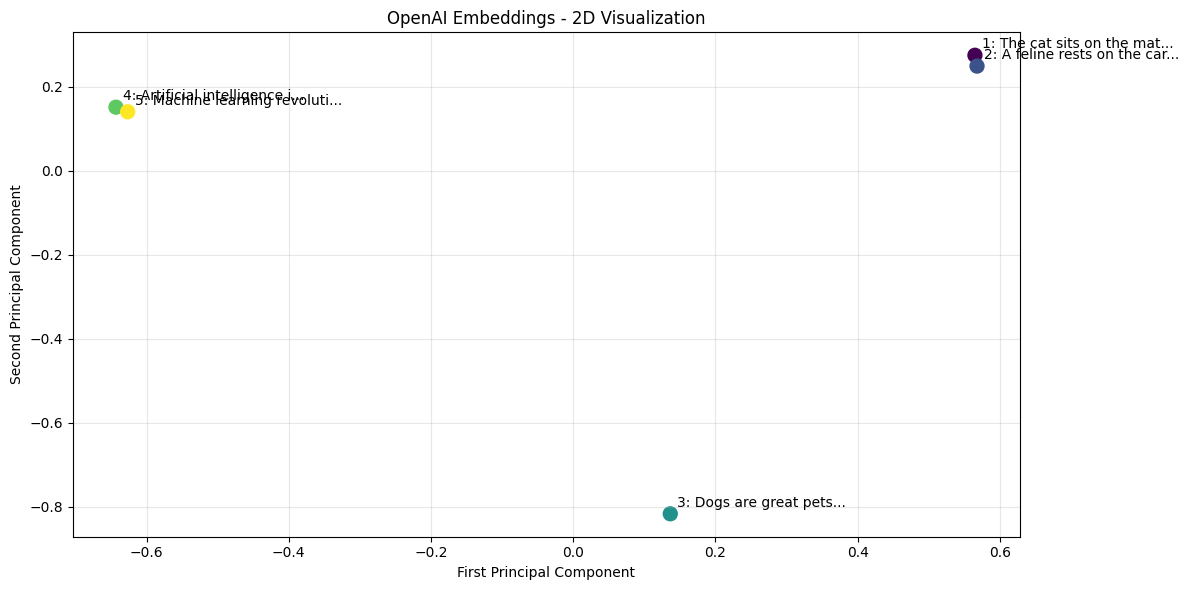

In [107]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_embeddings(embeddings, texts, title):
    """Visualize embeddings in 2D using PCA"""
    # Reduce dimensions to 2D
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Create the plot
    plt.figure(figsize=(12,6))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                         c=range(len(texts)), cmap='viridis', s=100)
    
    # Add labels for each point
    for i, text in enumerate(texts):
        plt.annotate(f'{i+1}: {text[:25]}...', 
                    (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                    xytext=(5, 5), textcoords='offset points')
    
    plt.title(f'{title} - 2D Visualization')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualize your embeddings
visualize_embeddings(openai_embeddings, sample_texts, 'OpenAI Embeddings')

## Comparing OpenAI vs Sentence Transformers

**Comparison Metrics:**
- **Similarity Scores**: How well each model captures relationships
- **Consistency**: How reliable the similarity measures are
- **Performance**: Speed and resource usage
- **Quality**: Subjective assessment of results

**What We're Testing:**
- Same texts, different models
- Looking for consistent patterns
- Understanding trade-offs between models

## Your Turn: Practice Exercise

**Assignment:**
1. Try your own text data
2. Compare different models
3. Experiment with preprocessing
4. Measure performance differences
5. Visualize your results

**Next Steps in RAG:**
- Vector databases for storing millions of embeddings
- Similarity search algorithms
- Integration with language models
- Evaluation metrics for RAG systems

**Key Takeaways:**
- Embeddings convert text to mathematical representations
- Similar meanings cluster together in vector space
- Model choice affects quality and performance
- Optimization techniques are crucial for production use